# Clase 2 - Conceptos generales de clasificación

En esta clase vamos a ver el clásico ejemplo del dataset de iris.
Vamos a ver distintos métodos de aprendizaje, medio rápidamente y vamos a ver formas de evaluación.
Primero chequeamos las librerías que vamos a utilizar y sus versiones.

In [1]:
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import IPython
import platform

print ('Python version:', platform.python_version())
print ('IPython version:', IPython.__version__)
print ('numpy version:', np.__version__)
print ('scikit-learn version:', sklearn.__version__)
print ('matplotlib version:', matplotlib.__version__)

Python version: 3.5.2
IPython version: 5.1.0
numpy version: 1.13.1
scikit-learn version: 0.19.0
matplotlib version: 2.0.2


## Dataset
Para una aplicación de aprendizaje automático, necesitamos un dataset. Scikit tiene algunos de prueba. En particular, tiene el que queremos utilizar.
Denotamos a __X__  como el conjunto de atributos e __y__ el conjunto de etiquetas.

In [2]:
#Aquí deben importar el dataset
# from sklearn import datasets

# iris = datasets.load_iris()
import pandas as pd

iris = pd.read_csv('../datasets/iris.data', sep=',', names=['sepal_length','sepal_width','petal_length','petal_width','iris_type'])

X_iris = iris.iloc[:,:-1]
y_iris = iris['iris_type']

Siempre es buena idea analizar el dataset antes de empezar a desarrollar. ¿Qué se puede decir de los datos? Es conveniente hacer un análisis de los atributos y de la clase objetivo.

Vamos a graficar los primeros dos atributos, y los últimos dos atributos por separado, dibujando en función de la clase objetivo.
Voy a dejar algunas partes

In [3]:
print(X_iris.shape)
print(y_iris.shape)

(150, 4)
(150,)


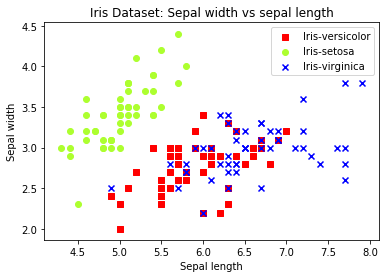

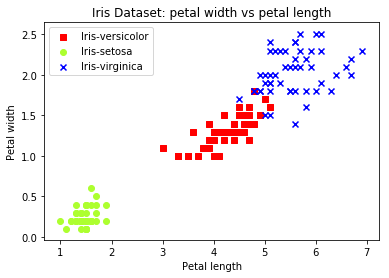

In [4]:
plt.figure('sepal')
#Pueden elegir otros colores si quieren
colormarkers = [ ['red','s'], ['greenyellow','o'], ['blue','x']]
for i, val in enumerate(set(y_iris)):
#En px y py tienen que ir las clases que corresponden a cada etiqueta, 
#para poder graficar los elementos del dataset por color
    filtered_values = X_iris[y_iris == val]
    px = filtered_values['sepal_length']
    py = filtered_values['sepal_width']
    plt.scatter(px, py, c=colormarkers[i][0], marker=colormarkers[i][1])

plt.title('Iris Dataset: Sepal width vs sepal length')
plt.legend(set(y_iris))
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.figure('petal')

for i, val in enumerate(set(y_iris)):
#Esto es lo mismo para los otros dos atributos.
    filtered_values = X_iris[y_iris == val]
    px = filtered_values.values[:,2]
    py = filtered_values.values[:,3]
    plt.scatter(px, py, c=colormarkers[i][0], marker=colormarkers[i][1])

plt.title('Iris Dataset: petal width vs petal length')
plt.legend(set(y_iris))
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

Por ahora vamos a utilizar únicamente los atributos relacionados con sepal, para poder visualizar los métodos utilizados.

## Procesamiento de datos
Ahora que tenemos una idea del dataset, vamos a procesar los datos.
En este caso, normalizamos los atributos.
Lo primero que hay que hacer es separar los atributos en entrenamiento y testeo.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Acá tienen que dividir el conjunto en testeo y entrenamiento, les va a servir la función train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris.values[:,0:2], y_iris, test_size=0.2, random_state=42)

print('X_train shape: ' + str(X_train.shape))
print('X_test shape: '  + str(X_test.shape))
print('y_train shape: ' + str(y_train.shape))
print('y_test shape: '  + str(y_test.shape))

X_train shape: (120, 2)
X_test shape: (30, 2)
y_train shape: (120,)
y_test shape: (30,)


Calculamos la esperanza y la desviación estándar de los atributos, para normalizar.

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# scaler = StandardScaler()
scaler.fit(X_train)

esp_width_train = scaler.mean_[0]
std_width_train = np.sqrt(scaler.var_)[0]

scaler.fit(X_test)

esp_width_test = scaler.mean_[0]
std_width_test = np.sqrt(scaler.var_)[0]

print ('Esperanza de sepal width (train):{:.2f} y su desviación estándard:{:.2f}'.format(esp_width_train, std_width_train))
print ('Esperanza de sepal width (test):{:.2f} y su desviación estándard:{:.2f}'.format(esp_width_test, std_width_test))


Esperanza de sepal width (train):5.81 y su desviación estándard:0.82
Esperanza de sepal width (test):5.98 y su desviación estándard:0.83


In [33]:
scaler.fit(X_train)

esp_length_train = scaler.mean_[1]
std_length_train = np.sqrt(scaler.var_)[1]

scaler.fit(X_test)

esp_length_test = scaler.mean_[1]
std_length_test = np.sqrt(scaler.var_)[1]

print ('Esperanza de sepal length (train):{:.2f} y su desviación estándard:{:.2f}'.format(esp_length_train, std_length_train))
print ('Esperanza de sepal length (test):{:.2f} y su desviación estándard:{:.2f}'.format(esp_length_test,std_length_test))

Esperanza de sepal length (train):3.06 y su desviación estándard:0.38
Esperanza de sepal length (test):3.04 y su desviación estándard:0.38


In [47]:
# Normalizamos y estudiamos la varianza de nuevo.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
# scaler.fit(X_train)

esp_length_train = scaler.mean_[1]
std_length_train = np.sqrt(scaler.var_)[1]

# scaler.fit(X_test)

esp_length_test = scaler.mean_[1]
std_length_test = np.sqrt(scaler.var_)[1]

# scaler.fit(X_train)

esp_width_train = scaler.mean_[0]
std_width_train = np.sqrt(scaler.var_)[0]

# scaler.fit(X_test)

esp_width_test = scaler.mean_[0]
std_width_test = np.sqrt(scaler.var_)[0]

print ('Esperanza de sepal width (train):{:.2f} y su desviación estándard:{:.2f}'.format(esp_width_train, std_width_train))
print ('Esperanza de sepal width (test):{:.2f} y su desviación estándard:{:.2f}'.format(esp_width_test, std_width_test))


print ('Esperanza de sepal length (train):{:.2f} y su desviación estándard:{:.2f}'.format(esp_length_train, std_length_train))
print ('Esperanza de sepal length (test):{:.2f} y su desviación estándard:{:.2f}'.format(esp_length_test, std_length_test))

Esperanza de sepal width (train):-0.21 y su desviación estándard:0.99
Esperanza de sepal width (test):-0.21 y su desviación estándard:0.99
Esperanza de sepal length (train):0.05 y su desviación estándard:1.18
Esperanza de sepal length (test):0.05 y su desviación estándard:1.18


¿Por qué dio distinto en el conjunto de testeo?
Imprimimos el conjunto de entrenamiento nuevamente.

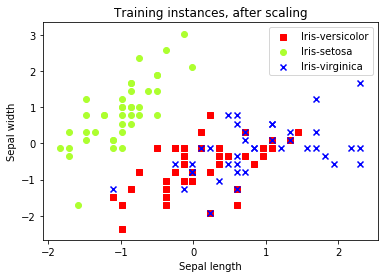

In [46]:
#Nuevamente completar xs, ys con los puntos correspondientes.

colormarkers = [ ['red','s'], ['greenyellow','o'], ['blue','x']]
plt.figure('Training Data')
for i, val in enumerate(set(y_iris)):
    filtered_values = X_train[y_train == val]
    xs = filtered_values[:,0]
    ys = filtered_values[:,1]
    plt.scatter(xs, ys, c=colormarkers[i][0], marker=colormarkers[i][1])

plt.title('Training instances, after scaling')
plt.legend(set(y_iris))
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()


## Un primer clasificador
Una técnica bastante usual es convertir el problema en uno de clasificación binaria: sólo queremos distinguir flores setosas del resto (elegimos las setosas porque parecen las más fáciles).
Para hacer esto, colapsamos las clases que no son setosa a la misma clase.

Tengan cuidado de no alterar el corpus original porque lo vamos a necesitar después.



In [ ]:
import copy 

print ('New training target classes:\n{0}'.format(y_train_setosa))
print ('New testing target classes:\n{0}'.format(y_test_setosa))


Ahora comenzamos la tarea de clasificación, vamos a implementar un clasificador lineal.
El procedimiento fit consiste en ajustar el clasificador a los valores de entrenamiento.

In [ ]:
from sklearn import linear_model 
clf = 

Por ahora vamos a dejar los parámetros por defecto, en las clases siguientes vamos a ver cómo elegir parámetros en cada modelo.  
Observen que nuestro clasificador es una recta.
Podemos dibujarla entonces


In [ ]:
print (clf.coef_,clf.intercept_)

In [ ]:

x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5

fig,axes = plt.subplots()
axes.set_aspect('equal')
axes.set_title('Setosa classification')
axes.set_xlabel('Sepal length')
axes.set_ylabel('Sepal width')
axes.set_xlim(x_min, x_max)
axes.set_ylim(y_min, y_max)
plt.sca(axes)
plt.scatter(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], c='red', marker='s')
plt.scatter(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], c='black', marker='x')
xs = # acá elegimos una cantidad arbitraria de puntos
ys = # Para graficar la recta, utilizamos los coeficientes calculados del clasificador.
plt.plot(xs, ys)
plt.show()

Ahora tenemos un predictor que nos dice si una planta es setosa o no (a la izquierda de la linea es setosa).
Pueden probar distintos valores.

## Clasificación usando las tres clases

El mismo clasificador que usamos provee etiquetado multiclase. Vamos a usarlo.

In [ ]:
clf2 = 
print (len(clf2.coef_))

Estudien el resultado. ¿Cómo resolvió scikit el problema de la clasificación multiclase?  

Ahora grafiquemos el nuevo clasificador

In [ ]:

x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xs = 
fig, axes = plt.subplots(1,3)
fig.set_size_inches(10,6)
for i in range(3):
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ iris.target_names[i] + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    plt.sca(axes[i])
    ys=
    plt.plot(xs,ys)    
    for j, val in enumerate(set(y_iris)):
        px = X_train[:, 0][y_train == val]
        py = X_train[:, 1][y_train == val]
        color = colormarkers[j][0] if j==i else 'black'
        marker = 'o' if j==i else 'x'
        plt.scatter(px, py, c=color, marker=marker)     

plt.show()

Vamos a predecir el ejemplo anterior usando el clasificador dos.

Al tener estos predictores, ¿qué hacemos cuándo dos de ellos clasifican distinto a una instancia?

## Evaluación del modelo


La medida más obvia es la precisión, pero, ¿por qué esto no es una buena idea?  
Scikit-learn provee un módulo de métricas que implementa varias medidas de performance.

In [ ]:
from sklearn import metrics
y_pred = clf2.predict(X_test)
accuracy = 
print ('Accuracy on the testing set:{:.2f}'.format(accuracy)


In [ ]:
print (metrics.classification_report(y_test, y_pred, target_names=set(y_iris)))


## Parte 2
Implementar un clasificador lineal a partir del siguiente dataset.

In [ ]:
from sklearn.model_selection import train_test_split
athletes = pd.read_csv('athlete_events.csv')
athletes = athletes.dropna(subset=['Medal'], how='any')
train, test = train_test_split(athletes, test_size=0.20)
train.to_csv('athlete_events_train.csv')
test.to_csv('athlete_events_test.csv')
athletes.shape